In [4]:
!ls ../data/raw

winequality.names
wine-quality.zip
winequality-data.csv
winequalityN.csv
winequality-solution-input.csv
winequality-submission-example.csv


In [2]:
# imports
import pandas as pd
import numpy as np
import os

In [3]:
raw_data_path = os.path.join(os.path.pardir, 'data', 'raw')
train_filepath = os.path.join(raw_data_path, 'winequality-data.csv')
test_filepath = os.path.join(raw_data_path, 'winequality-solution-input.csv')

In [5]:
train_df = pd.read_csv(train_filepath, index_col='id')
test_df = pd.read_csv(test_filepath, index_col='id')

In [10]:
train_df.info()
print('\n\n')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3918 entries, 981 to 4898
Data columns (total 12 columns):
fixed.acidity           3918 non-null float64
volatile.acidity        3918 non-null float64
citric.acid             3918 non-null float64
residual.sugar          3918 non-null float64
chlorides               3918 non-null float64
free.sulfur.dioxide     3918 non-null float64
total.sulfur.dioxide    3918 non-null float64
density                 3918 non-null float64
pH                      3918 non-null float64
sulphates               3918 non-null float64
alcohol                 3918 non-null float64
quality                 3918 non-null int64
dtypes: float64(11), int64(1)
memory usage: 397.9 KB



<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 1 to 980
Data columns (total 12 columns):
fixed.acidity           980 non-null float64
volatile.acidity        980 non-null float64
citric.acid             980 non-null float64
residual.sugar          980 non-null float64


In [7]:
train_df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
id,,,,,,,,,,,,
981,6.7,0.15,0.38,1.7,0.037,20.0,84.0,0.99046,3.09,0.53,11.4,6
982,6.7,0.44,0.31,1.9,0.030,41.0,104.0,0.99000,3.29,0.62,12.6,7
983,6.1,0.17,0.21,1.9,0.090,44.0,130.0,0.99255,3.07,0.41,9.7,5
984,6.6,0.39,0.22,4.0,0.038,17.0,98.0,0.99018,3.25,0.53,13.0,7
985,6.8,0.32,0.34,6.0,0.050,5.0,129.0,0.99530,3.19,0.40,9.1,5


In [8]:
test_df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
id,,,,,,,,,,,
1,6.7,0.29,0.45,14.3,0.054,30.0,181.0,0.99869,3.14,0.57,9.1
2,7.4,0.32,0.55,16.6,0.056,53.0,238.0,1.00170,2.96,0.58,8.7
3,7.6,0.38,0.20,3.4,0.046,9.0,116.0,0.99440,3.15,0.41,9.4
4,7.9,0.14,0.45,1.8,0.050,17.0,114.0,0.99480,3.33,0.49,10.7
5,7.9,0.16,0.30,7.4,0.050,58.0,152.0,0.99612,3.12,0.37,9.5


In [9]:
test_df['quality'] = -888

In [11]:
df = pd.concat((train_df, test_df), axis=0)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898 entries, 981 to 980
Data columns (total 12 columns):
fixed.acidity           4898 non-null float64
volatile.acidity        4898 non-null float64
citric.acid             4898 non-null float64
residual.sugar          4898 non-null float64
chlorides               4898 non-null float64
free.sulfur.dioxide     4898 non-null float64
total.sulfur.dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 497.5 KB


In [13]:
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
id,,,,,,,,,,,,
981,6.7,0.15,0.38,1.7,0.037,20.0,84.0,0.99046,3.09,0.53,11.4,6
982,6.7,0.44,0.31,1.9,0.030,41.0,104.0,0.99000,3.29,0.62,12.6,7
983,6.1,0.17,0.21,1.9,0.090,44.0,130.0,0.99255,3.07,0.41,9.7,5
984,6.6,0.39,0.22,4.0,0.038,17.0,98.0,0.99018,3.25,0.53,13.0,7
985,6.8,0.32,0.34,6.0,0.050,5.0,129.0,0.99530,3.19,0.40,9.1,5


In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

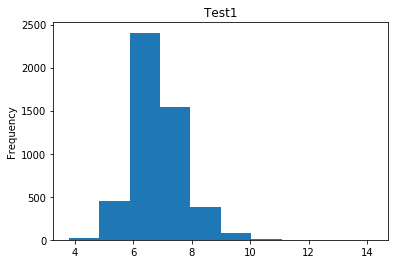

In [17]:
df['fixed.acidity'].plot(kind='hist', rot=0, title='Test1')

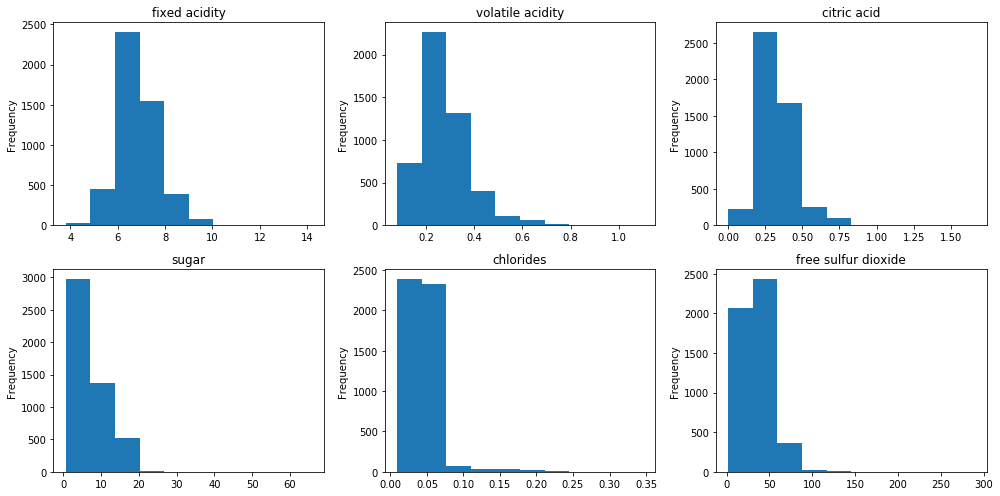

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(14,7))
df['fixed.acidity'].plot(ax=axes[0,0],kind='hist', rot=0, title='fixed acidity')
df['volatile.acidity'].plot(ax=axes[0,1],kind='hist', rot=0, title='volatile acidity')
df['citric.acid'].plot(ax=axes[0,2],kind='hist', rot=0, title='citric acid')
df['residual.sugar'].plot(ax=axes[1,0],kind='hist', rot=0, title='sugar')
df['chlorides'].plot(ax=axes[1,1],kind='hist', rot=0, title='chlorides')
df['free.sulfur.dioxide'].plot(ax=axes[1,2],kind='hist', rot=0, title='free sulfur dioxide')


plt.tight_layout()

plt.show()

In [24]:
df.describe(include='all')

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,-172.971009
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,357.643131
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,-888.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000
